# Laplacian eigenmaps

In this approach we use Laplacian eigenmaps to compute an embedding of the large language model embeddings (an embedding of embeddings).

In [3]:
import pandas as pd
import numpy as np
import phate
import scipy.spatial.distance as distance

# Here the scaled with the embeddings are loaded. Change the file to load
# embeddings from a different language model.
scales = pd.read_csv('scales_openAI_large.csv')

# select the rows of scales where the scaleID field is "NEO" or "PID"
scales = scales[scales['scaleID'].isin(['NEO', 'PID'])]

# form matrix of embeddings
mx = scales.embedding.apply(eval).to_list()
mx = np.asarray(mx)

# load scales data
data = pd.read_csv('scales_data.csv')

# select the columns of the dataframe data where the column names starts with "PID" or "NEO"
data = data[data.columns[data.columns.str.startswith('PID') | data.columns.str.startswith('NEO')]]

# form the correlation matrix of the scales data
corr_mx = data.corr().values
corr_values = distance.squareform(1 - corr_mx)

# extract the upper triangle of a matrix into a vector
def extract_upper_triangle(matrix):
    n = matrix.shape[0]
    return matrix[np.triu_indices(n, 1)]
corr_values = extract_upper_triangle(corr_mx)

In [29]:
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(n_components=15, affinity='rbf', n_neighbors=12)
Y_Lapl = embedding.fit_transform(mx)

# Create a distance matrix from the data matrix mx
dist_values = distance.pdist(Y_Lapl, metric='euclidean')
dist_mx = distance.squareform(dist_values)


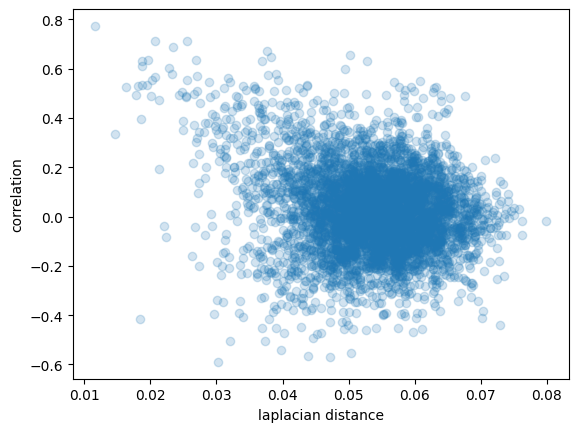

In [30]:

# Print a scatter plot of of dist_values and corr_values
import matplotlib.pyplot as plt
plt.scatter(dist_values, corr_values, alpha = 0.2)
plt.xlabel('laplacian distance')
plt.ylabel('correlation')
plt.show()